The purpose of this notebook is to demonstrate how to refine with locally defined GSAS-II functions.



# Imports

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import sys

sys.path += ["../../../easyXRD"]


import easyxrd
from easyxrd.core import exrd

import xarray as xr
import numpy as np
import pybaselines
from copy import deepcopy



Checking required packages:

---xarray package with version 2024.7.0 is available and can be imported 
---pyFAI package with version 2024.5.0 is available and can be imported 
---pymatgen package with version 2024.7.18 is available and can be imported 
---scipy package with version 1.14.0 is available and can be imported 
---ipympl package with version 0.9.4 is available and can be imported 
---numpy package with version 1.26.4 is available and can be imported 
---mp_api package with version 0.41.2 is available and can be imported 
---fabio package with version 2024.4.0 is available and can be imported 
---pandas package with version 2.2.2 is available and can be imported 


Imported easyxrd with the following configuration:

- easyxrd_scratch_path : /home/mt/.easyxrd_scratch
- gsasii_lib_path : /home/mt/g2full/GSAS-II/GSASII
- mp_api_key : none


In [5]:
# importing matplotlib for plots.
%matplotlib widget
import matplotlib.pyplot as plt

plt.rcParams.update({"figure.max_open_warning": 0})
plt.rcParams["figure.constrained_layout.use"] = True

In [6]:
%%time


# import pyFAI,fabio
# ai_file = 'tiff_files/_calibration.poni'
# mask_file = 'tiff_files/_mask.edf'
# ai = pyFAI.load(ai_file)
# mask = fabio.open(mask_file).data

sample_Kapton = exrd()
# sample_Kapton.load_xrd_data(from_tiff_file='tiff_files/Kapton.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_Kapton.export_ds(save_dir='nc_files',save_name='Kapton.nc')
sample_Kapton.load_xrd_data(from_nc_file="nc_files/Kapton.nc", plot=False)

sample_Air = exrd()
# sample_Air.load_xrd_data(from_tiff_file='tiff_files/Air_scattering.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_Air.export_ds(save_dir='nc_files',save_name='Air.nc')
sample_Air.load_xrd_data(from_nc_file="nc_files/Air.nc", plot=False)

sample_LaB6 = exrd()
# sample_LaB6.load_xrd_data(from_tiff_file='tiff_files/NIST-LaB6.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_LaB6.export_ds(save_dir='nc_files',save_name='NIST-LaB6.nc')
sample_LaB6.load_xrd_data(from_nc_file="nc_files/NIST-LaB6.nc", plot=False)

sample_CeO2 = exrd()
# sample_CeO2.load_xrd_data(from_tiff_file='tiff_files/NIST-CeO2.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_CeO2.export_ds(save_dir='nc_files',save_name='NIST-CeO2.nc')
sample_CeO2.load_xrd_data(from_nc_file="nc_files/NIST-CeO2.nc", plot=False)

sample_mix = exrd()
# sample_mix.load_xrd_data(from_tiff_file='tiff_files/NIST-LaB6-CeO2-mix.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_mix.export_ds(save_dir='nc_files',save_name='NIST-LaB6-CeO2-mix.nc')
sample_mix.load_xrd_data(from_nc_file="nc_files/NIST-LaB6-CeO2-mix.nc", plot=False)

phases_LaB6 = [
    {
        "mp_id": "none",
        "cif": "_cifs/LaB6_a=4.1568_NIST_value.cif",
        "label": "LaB6",
        "scale": 1.00,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

phases_CeO2 = [
    {
        "mp_id": "none",
        "cif": "_cifs/CeO2_a=5.4113_NIST_value.cif",
        "label": "CeO2",
        "scale": 1.00,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

phases_mix = [
    {
        "mp_id": "none",
        "cif": "_cifs/LaB6_a=4.1568_NIST_value.cif",
        "label": "LaB6",
        "scale": 1.00,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
    {
        "mp_id": "none",
        "cif": "_cifs/CeO2_a=5.4113_NIST_value.cif",
        "label": "CeO2",
        "scale": 1.00,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

CPU times: user 66.4 ms, sys: 2.94 ms, total: 69.3 ms
Wall time: 68.5 ms



 ⏩--1st refinement with LeBail is completed: Rwp/GoF is 11.092/0.157 on 1 variable(s) 

 ✅--Cell parameters of all phases are refined. Rwp/GoF is now 6.414/0.091 on 2 variable(s) (was 11.092(-42.17%)/0.157(-42.16%✨))

 ✅--After setting LeBail refinement to True, Rwp/GoF is now 7.398/0.105 on 1 variable(s) (was 6.414(15.34%)/0.091(15.32%❗))
CPU times: user 6.71 s, sys: 39.3 ms, total: 6.75 s
Wall time: 6.91 s


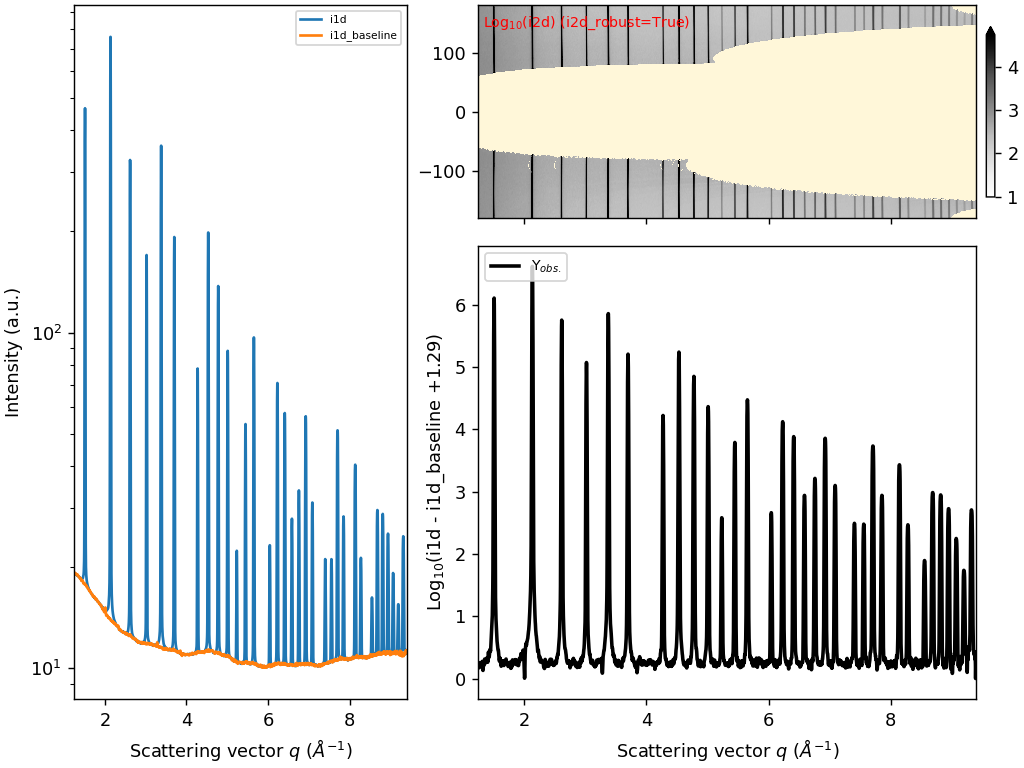

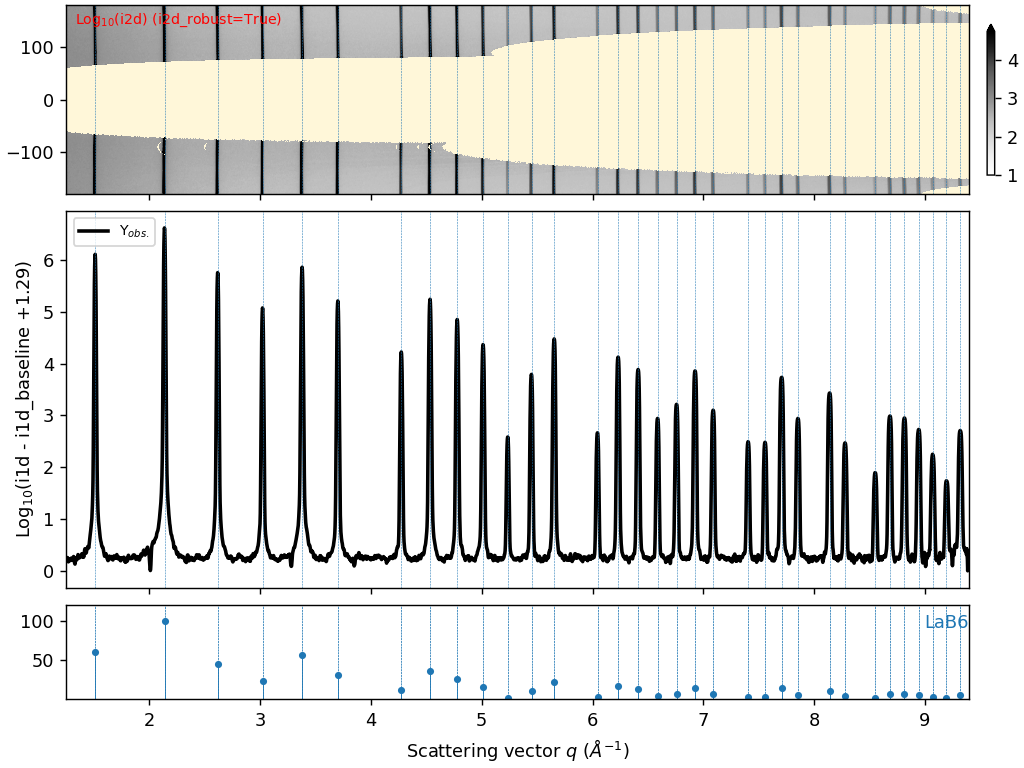

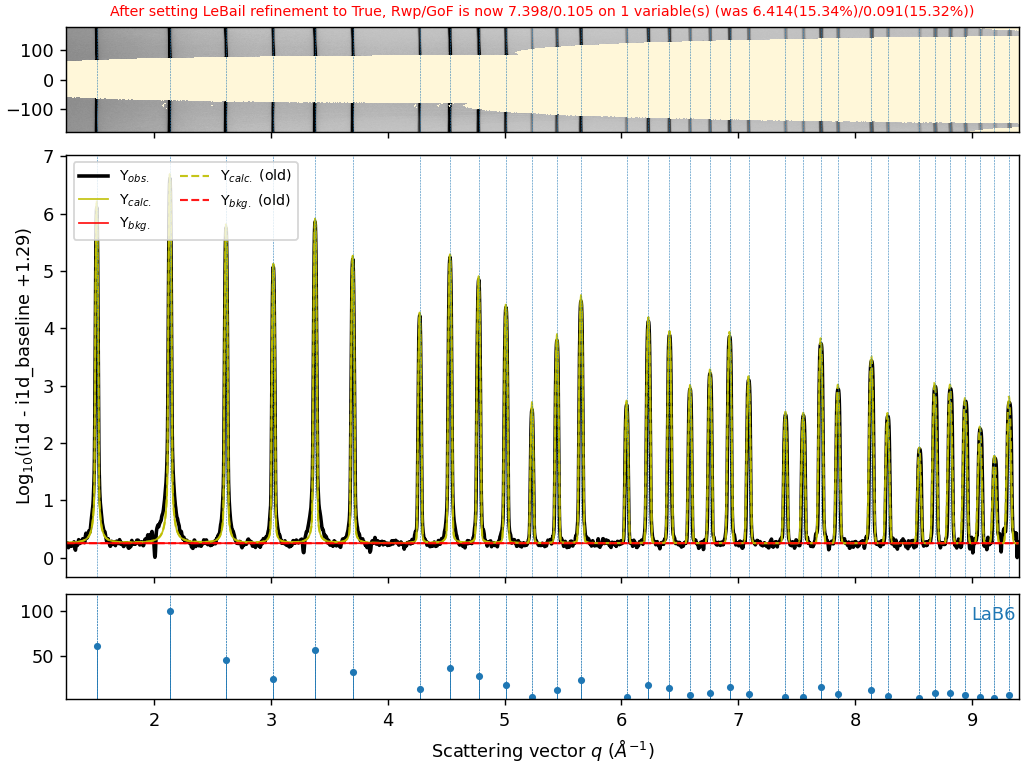

In [7]:
%%time

sample = deepcopy(sample_LaB6)
phases = phases_LaB6

sample.get_baseline(
    input_bkg=deepcopy(sample_Kapton),
    arpls_lam=1e5,
    use_arpls=True,
    get_i2d_baseline = False,
    use_i2d_baseline = False,
    roi_radial_range=[1.25, 9.4],
    # roi_azimuthal_range=(20,50),
    spotty_data_correction=False,
    spotty_data_correction_threshold=2,
    plot=True,
)
sample.load_phases(phases=phases, plot=True)

# Refinements
sample.setup_gsas2_refiner(instprm_from_gpx="gsas_instprms.gpx",plot=False,normalize=True)
sample.refine_cell_parameters()
sample.set_LeBail(set_to=False, refine=True, plot=True)


 ⏩--1st refinement with LeBail is completed: Rwp/GoF is 14.049/0.187 on 1 variable(s) 

 ✅--Cell parameters of all phases are refined. Rwp/GoF is now 6.449/0.086 on 2 variable(s) (was 14.049(-54.10%)/0.187(-54.09%✨))
 ✅--Strain broadening of all phases are refined. Rwp/GoF is now 6.215/0.083 on 2 variable(s) (was 6.449(-3.62%)/0.086(-3.62%))
 ✅--Size broadening of all phases are refined. Rwp/GoF is now 6.080/0.081 on 2 variable(s) (was 6.215(-2.17%)/0.083(-2.17%))

 ✅--After setting LeBail refinement to True, Rwp/GoF is now 8.246/0.110 on 1 variable(s) (was 6.080(35.62%)/0.081(35.60%❗))
 ✅--Phase fractions of all phases are refined. Rwp/GoF is now 8.246/0.110 on 1 variable(s) (was 8.246(0.00%)/0.110(0.00%❗))
 ✅--U property of Ce0 site of CeO2 phase is refined. Rwp/GoF is now 6.559/0.087 on 2 variable(s) (was 8.246(-20.46%)/0.110(-20.45%✨))
 ✅--U property of O1 site of CeO2 phase is refined. Rwp/GoF is now 6.527/0.087 on 3 variable(s) (was 6.559(-0.49%)/0.087(-0.47%❗))
CPU times: user 

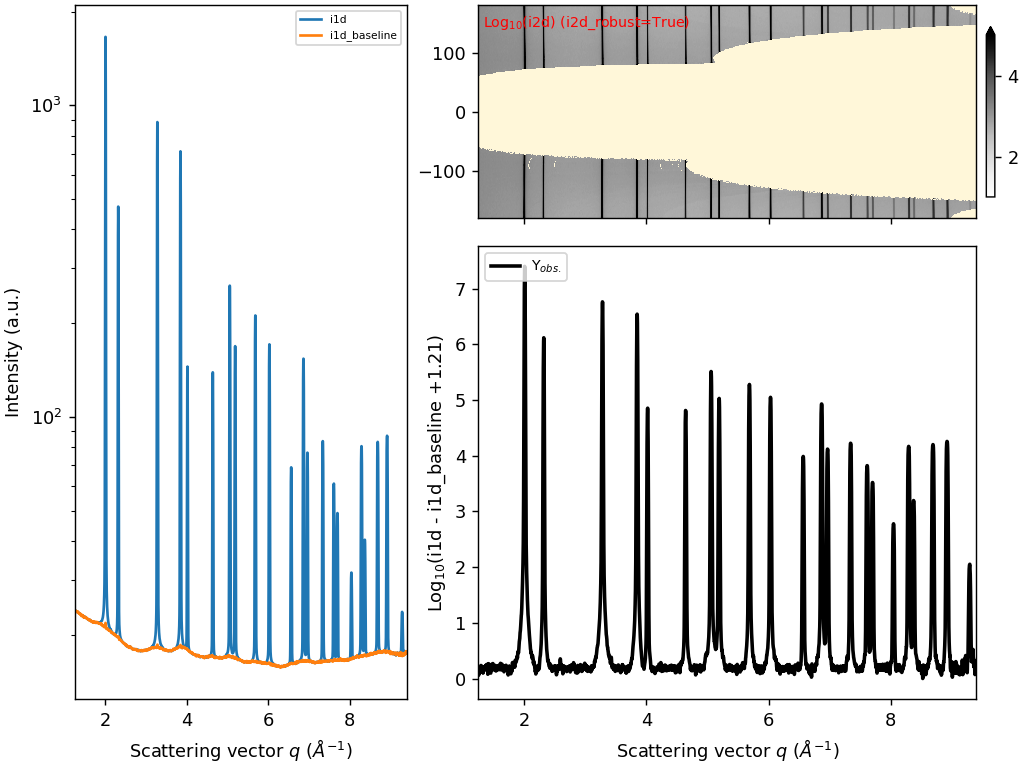

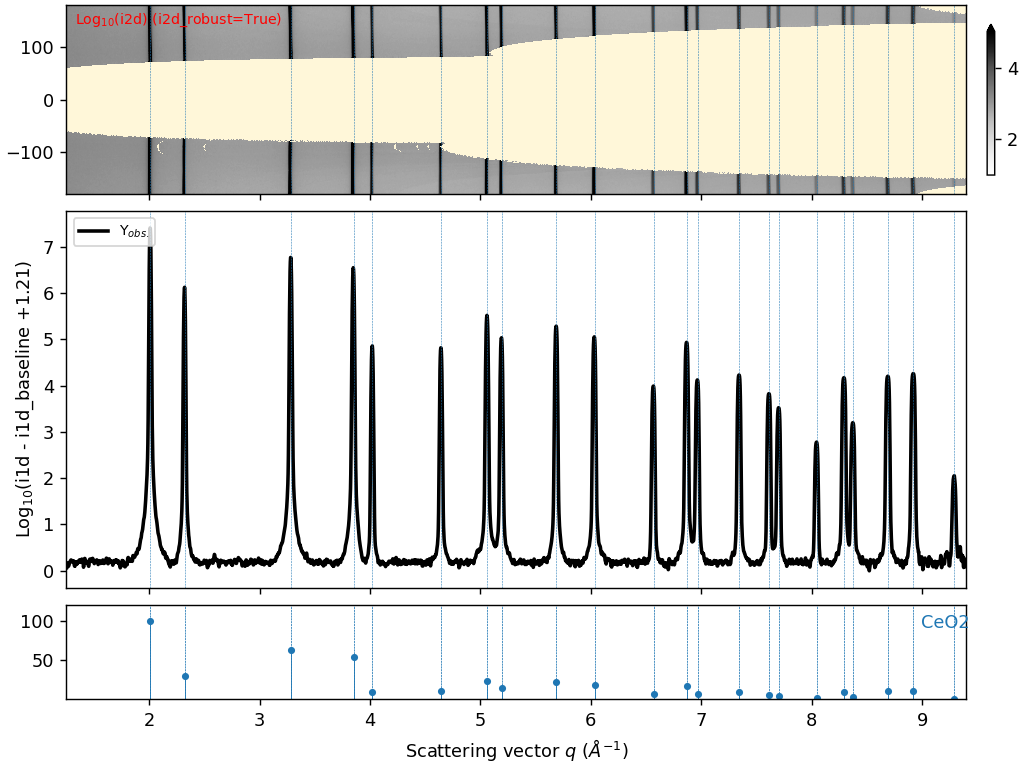

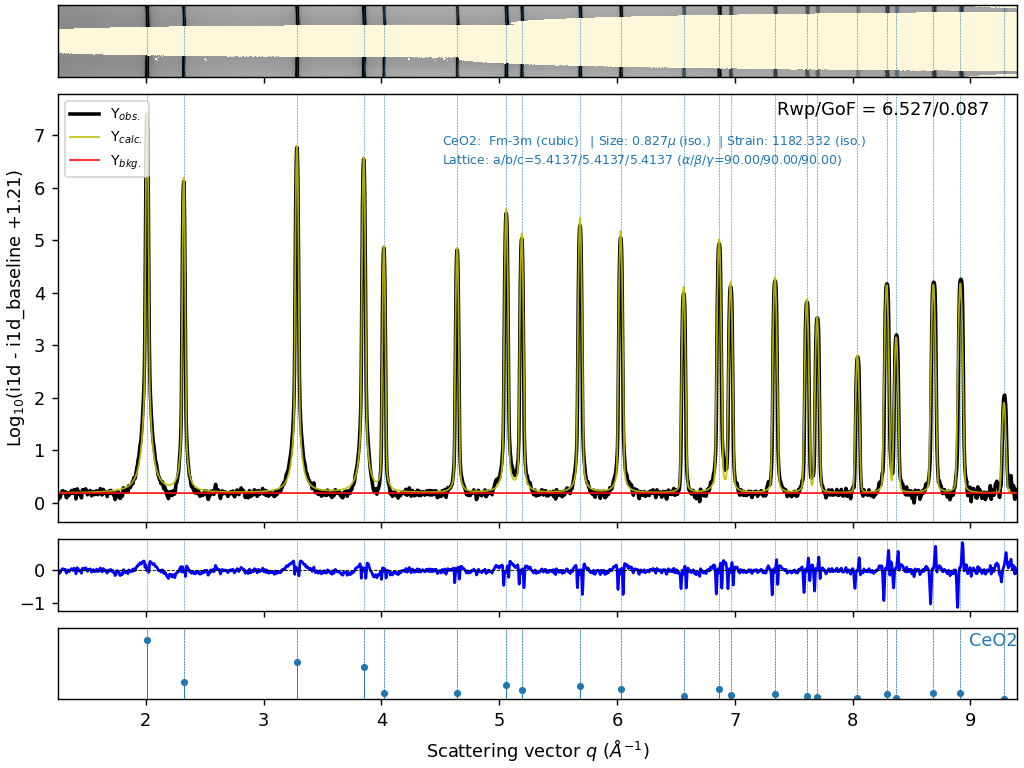

In [9]:
%%time

sample = deepcopy(sample_CeO2)
phases = phases_CeO2

sample.get_baseline(
    input_bkg=deepcopy(sample_Kapton),
    arpls_lam=1e5,
    use_arpls=True,
    get_i2d_baseline = False,
    use_i2d_baseline = False,
    roi_radial_range=[1.25, 9.4],
    # roi_azimuthal_range=(20,50),
    spotty_data_correction=False,
    spotty_data_correction_threshold=2,
    plot=True,
)
sample.load_phases(phases=phases, plot=True)

# Refinements
sample.setup_gsas2_refiner(instprm_from_gpx="gsas_instprms.gpx",plot=False,normalize=True)
sample.refine_cell_parameters(plot=False)
sample.refine_strain_broadening(plot=False)
sample.refine_size_broadening(plot=False)

sample.set_LeBail(set_to=False, refine=True, plot=False)
sample.refine_phase_fractions(plot=False,set_to_false_after_refinement=False)
sample.refine_site_property(phase_ind=0,site_ind=0,refinement_flags='U',set_to_false_after_refinement=False)
sample.refine_site_property(phase_ind=0,site_ind=1,refinement_flags='U',set_to_false_after_refinement=False)
sample.plot()

In [ ]:
%%time

sample = deepcopy(sample_mix)
phases = phases_mix

sample.get_baseline(
    input_bkg=sample_Kapton,
    arpls_lam=1e5,
    use_arpls=True,
    get_i2d_baseline = False,
    use_i2d_baseline = False,
    roi_radial_range=[1.25, 9.4],
    spotty_data_correction=False,
    spotty_data_correction_threshold=2,
    plot=True,
)
sample.load_phases(phases=phases, plot=True)

# Refinements
sample.setup_gsas2_refiner(instprm_from_gpx="gsas_instprms.gpx",plot=False,normalize=True)
sample.refine_cell_parameters()
sample.refine_strain_broadening()
sample.refine_size_broadening()
sample.refine_background(num_coeffs=1,plot=True)

sample.set_LeBail(set_to=False, refine=True, plot=False)
sample.refine_phase_fractions(plot=True,set_to_false_after_refinement=False)
# sample.refine_site_property(phase_ind=1,site_ind=0,refinement_flags='U',set_to_false_after_refinement=False)
# sample.refine_site_property(phase_ind=1,site_ind=1,refinement_flags='U',set_to_false_after_refinement=False)
# sample.refine_phase_fractions(plot=True,set_to_false_after_refinement=False)



 ⏩--1st refinement with LeBail is completed: Rwp/GoF is 39.482/0.666 on 1 variable(s) 

 ✅--Background is refined. Rwp/GoF is now 10.649/0.180 on 11 variable(s) (was 39.482(-73.03%)/0.666(-72.99%✨))
 ✅--Cell parameters of all phases are refined. Rwp/GoF is now 6.360/0.107 on 3 variable(s) (was 10.649(-40.27%)/0.180(-40.35%✨))
 ✅--Strain broadening of all phases are refined. Rwp/GoF is now 6.153/0.104 on 3 variable(s) (was 6.360(-3.25%)/0.107(-3.25%))
 ✅--Size broadening of all phases are refined. Rwp/GoF is now 6.135/0.104 on 3 variable(s) (was 6.153(-0.30%)/0.104(-0.30%❗))
 ✅--Background is refined. Rwp/GoF is now 6.092/0.103 on 11 variable(s) (was 6.135(-0.70%)/0.104(-0.58%❗))

 ✅--After setting LeBail refinement to True, Rwp/GoF is now 9.608/0.162 on 1 variable(s) (was 6.092(57.72%)/0.103(57.48%❗))
 ✅--Phase fractions of all phases are refined. Rwp/GoF is now 7.729/0.130 on 2 variable(s) (was 9.608(-19.56%)/0.162(-19.55%✨))
 ✅--U property of Ce0 site of CeO2 phase is refined. Rwp/G

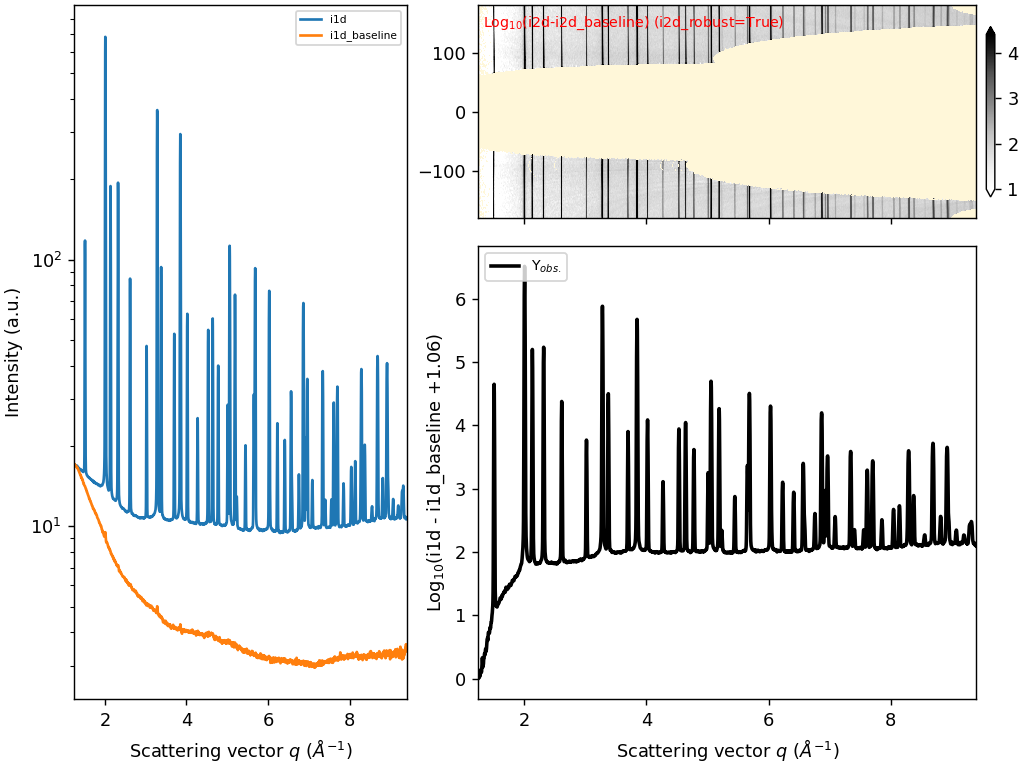

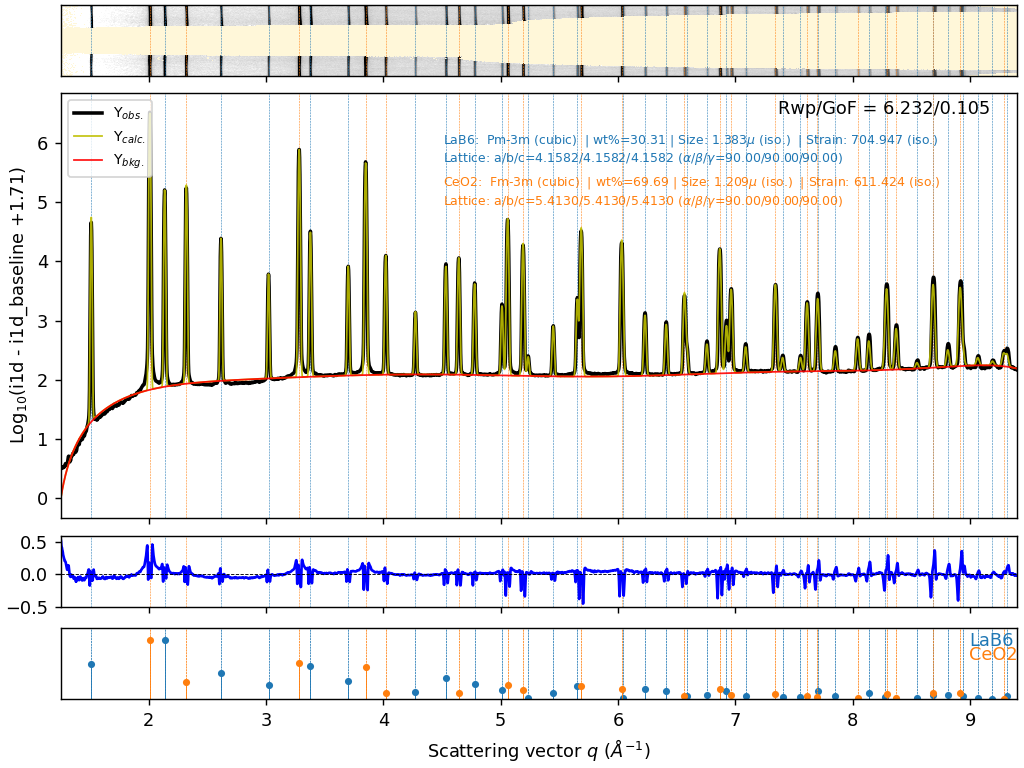

In [12]:
%%time

sample = deepcopy(sample_mix)
phases = phases_mix

sample.get_baseline(
    input_bkg=deepcopy(sample_Kapton),
    arpls_lam=1e5,
    use_arpls=False,
    get_i2d_baseline = False,
    use_i2d_baseline = False,
    roi_radial_range=[1.25, 9.4],
    spotty_data_correction=False,
    spotty_data_correction_threshold=2,
    plot=True,
)
sample.load_phases(phases=phases, plot=False)

# Refinements
sample.setup_gsas2_refiner(instprm_from_gpx="gsas_instprms.gpx",plot=False,normalize=True)
sample.refine_background(num_coeffs=10,plot=False)
sample.refine_cell_parameters(plot=False)
sample.refine_strain_broadening(plot=False)
sample.refine_size_broadening(plot=False)
sample.refine_background(num_coeffs=10,plot=False)

sample.set_LeBail(set_to=False, refine=True, plot=False)
sample.refine_phase_fractions(plot=False,set_to_false_after_refinement=False)
sample.refine_site_property(phase_ind=1,site_ind=0,refinement_flags='U',set_to_false_after_refinement=False,plot=False)
sample.refine_site_property(phase_ind=1,site_ind=1,refinement_flags='U',set_to_false_after_refinement=False,plot=False)
sample.refine_phase_fractions(plot=False,set_to_false_after_refinement=False)
sample.refine_background(num_coeffs=10,plot=False)
sample.plot()